In [1]:
!pip install pyod

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from pyod.models.abod import ABOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
path_jeu = 'C:/Users/THINKPad/Desktop/ProjetInter/PIP_2022NA/DATA1/ECHANTILLONS/'
df = pd.read_csv(path_jeu + 'donnee_v2_ech_train.csv')

In [6]:
df = df.drop([df.columns[0]],axis = 1)
df

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764466,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
764467,1,1,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
764468,1,1,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
764469,1,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
quali_col = []
count = 0
for i, name in zip(df.dtypes, df.columns):
    if i == "object":
        quali_col.append(name)

print(len(quali_col))

0


In [ ]:
#data_quanti = df.drop(columns=quali_col)
#data_quanti

In [12]:
#data_quanti = data_quanti.sample(1000)
#data_quanti


,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
146184,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
384127,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
325063,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
679610,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
388267,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159464,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
581964,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
383745,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
684483,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
df3 = df.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"])
df3

,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,NBJ_CNT_AGENCE_DEPOT_6M,NBJ_CNT_AGENCE_VENTE_6M,NBJ_CNT_RDV_AGENCE_6M,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764466,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
764467,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
764468,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
764469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df3_col = np.array(df3.columns.values.tolist())
df3_col


array(['TOP_E_RELEVE', 'MESSAGERIE_WEB_ACTIVE', 'FIAB_TEL_DOMICILE',
       'FIAB_TEL_TRAVAIL', 'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA',
       'NBJ_CNT_AGENCE_DEPOT_6M', 'NBJ_CNT_AGENCE_VENTE_6M',
       'NBJ_CNT_RDV_AGENCE_6M', 'NBJ_CNT_AUTOMATE_RETRAIT_6M',
       'NBJ_CNT_AUTOMATES_DEPOT_6M', 'NBJ_CNT_AGENCE_RETRAIT_6M',
       'NBJ_CNT_AGENCE_6M', 'NBJ_CNT_SMS_6M', 'NBJ_CNT_EMAIL_6M',
       'NBJ_CNT_APPELENTRANTS_6M', 'NBJ_CNT_AUTOMATE_6M',
       'NBJ_CNT_LETTRES_6M', 'TOT_CNX_WEB_WEEK_6M', 'TOT_CNX_WEB_END_6M',
       'TOT_CCOMPTE_WEB_6M', 'TOT_IMPRESSIONRIB_WEB_6M',
       'TOT_TLCHGMTEDOC_WEB_6M', 'TOT_CCOMPTE_MBANQUE_6M',
       'TOT_CMS_WEB_6M', 'TOT_CVAD_WEB_6M', 'TOT_VEL_WEB_6M',
       'TOT_ATT_SIGN_VAD_WEB_6M', 'TOT_CHABITAT_WEB_6M',
       'TOT_MODIF_PARAM_CARTE_WEB_6M', 'TOT_CNX_INVSTORE_WEB_6M',
       'NB_JR_WEB_6M', 'NB_CNXS_WEB_6M', 'NB_JR_MBANQUE_6M',
       'NB_CNXS_MBANQUE_6M', 'NB_JR_CABOURSE_6M', 'NB_CNXS_CABOURSE_6M',
       'NB_JR_MACARTE_6M', 'NB_CN

In [18]:
#Mise à l'échelle des données
#minmax = MinMaxScaler(feature_range=(0, 1))
#a = minmax.fit_transform(df3)
#data = pd.DataFrame(a)


In [ ]:
from sklearn import preprocessing
normalized_df = pd.DataFrame(preprocessing.normalize(df3),columns=df3.columns)
normalized_df

In [16]:
 #Définir un rapportAnomal
outliers_fraction = 0.01
clf = ABOD(contamination=outliers_fraction)
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.figure(figsize=(20, 15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [18]:
#Entrainer les donnees
clf.fit(df3)


ABOD(contamination=0.01, method='fast', n_neighbors=5)

In [19]:
# Predict outlier score
scores_pred = clf.decision_function(df3) * -1
scores_pred
        
  

array([1.61707999e-16, 2.14277455e-17, 1.06128239e-16, 1.65013594e-15,
       1.44681210e-22, 3.42871897e-23, 4.72113485e-18, 2.93381436e-22,
       5.86940267e-17, 1.11213184e-18, 3.53762713e-07, 1.10681450e-19,
       5.08674556e-05, 1.73791781e-18, 8.69457033e-20, 3.70748787e-19,
       5.28019435e-21, 1.85164862e-25, 2.17765762e-14, 1.21295335e-19,
       1.60894630e-20, 3.61968171e-06, 3.97677332e-23, 2.32583677e-14,
       2.20558613e-05, 2.99542995e-07, 2.71967155e-08, 1.29623365e-20,
       1.25989325e-15, 3.83948269e-22, 3.73623212e-20, 6.18405807e-06,
       1.43878032e-15, 2.33562101e-18, 9.31817671e-20, 2.10575745e-17,
       8.35532688e-17, 3.89569582e-18, 1.69703570e-18, 2.33553581e-18,
       1.39882787e-08, 2.44821862e-17, 1.37430413e-21, 4.18555064e-19,
       4.10678391e-07, 5.67707441e-20, 6.79604966e-20, 2.44493208e-20,
       3.91107151e-19, 2.66472647e-17, 1.34189824e-17, 1.59944498e-18,
       9.54163137e-10, 1.46874681e-14, 7.14414964e-19, 6.63939002e-19,
      

In [20]:
# Des données qui prédisent les valeurs aberrantes et les valeurs normales
y_pred = clf.predict(df3)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
seuil = np.percentile(scores_pred, 100 * outliers_fraction)
seuil

2.7199849940150102e-05

In [21]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc


C:\Python\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


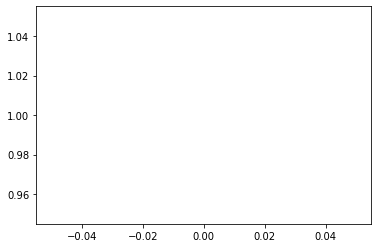

Air sous la courbe :  nan


In [27]:
value, f1_score, precision, recall = evaluation(scores_pred, data_quanti["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  
